In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
!pip install gensim

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [12]:
news = pd.read_csv('C:/Users/awadh/nlpspam_train.csv',encoding='latin-1')
news_test = pd.read_csv('C:/Users/awadh/nlpspam_test.csv',encoding='latin-1')
news.head(50)

Unnamed: 0                                              title  \
0          0.0  Taiwan holds anti-landing drill on frontline i...   
1          1.0  Japan to allow foreign long-term residents in ...   
2          2.0  Rescue of stranded whales in Australia enters ...   
3          3.0  Aboriginal group says Rio Tinto ignored pleas ...   
4          4.0  UK police officer shot dead at custody centre ...   
5          5.0  China says WHO gave blessing for coronavirus v...   
6          6.0  U.S. senators, citing Uighurs, urge Netflix to...   
7          7.0  North Korean leader offers rare apology for ki...   
8          8.0  UK PM Johnson offers condolences to family of ...   
9          9.0  'Our first dictatorship is school': Thai kids ...   
10        10.0  Taiwan holds anti-landing drill on frontline i...   
11        11.0  Japan to allow foreign long-term residents in ...   
12        12.0  Rescue of stranded whales in Australia enters ...   
13        13.0  Aboriginal group says Rio Tinto ignored pleas ...   
14        14.0  UK police officer shot dead at custody centre ...   
15        15.0  China says WHO gave blessing for coronavirus v...   
16        16.0  U.S. senators, citing Uighurs, urge Netflix to...   
17        17.0  North Korean leader offers rare apology for ki...   
18        18.0  UK PM Johnson offers condolences to family of ...   
19        19.0  'Our first dictatorship is school': Thai kids ...   
20         NaN                                              title   
21         0.0  Runny nose, stay home? Canada schools debate h...   
22         1.0  Israel becomes new obstacle for Sudan in quest...   
23         2.0  Four people injured in knife attack in Paris: ...   
24         3.0  Israel tightens second-wave lockdown as Netany...   
25         4.0  Inspired by Thunberg, veteran climate activist...   
26         5.0  Singapore COVID-19-testing 'SwabBot' pushes bo...   
27         6.0  Putin calls for reset in cyber ties with U.S.,...   
28         7.0  India to hold election in Bihar despite surgin...   
29         8.0  Four stabbed in Paris attack near old Charlie ...   
30         9.0  France summoned Iranian envoy over human right...   
31        10.0  India to hold election in Bihar despite surgin...   
32        11.0  France summoned Iranian envoy over human right...   
33        12.0            U.S., UK announce AI partnership: Axios   
34        13.0  Britain criticises China over Xinjiang and Hon...   
35        14.0  North Korean leader offers rare apology for ki...   
36        15.0  Red locusts destroy 500 hectares Nambian grazi...   
37        16.0  Spanish government recommends to lock down all...   
38        17.0  Hong Kong student faces charges of inciting se...   
39        18.0  The ventilators never came: How graft hampered...   
40        19.0  Britain, in rare rebuke of China at U.N. right...   
41        20.0  The ventilators never came: How graft hampered...   
42        21.0  Britain, in rare rebuke of China at U.N. right...   
43        22.0  Iran, Russia discussing joint production of CO...   
44        23.0  Russia doesn't plan lockdowns despite increase...   
45        24.0  EU air safety head says in-flight COVID infect...   
46        25.0  Czechs plan to buy air defence from Israel's R...   
47        26.0  Taiwan holds anti-landing drill on frontline i...   
48        27.0  Rescue of stranded whales in Australia enters ...   
49        28.0  Aboriginal group says Rio Tinto ignored pleas ...   

                                            body_text  
0   By Reuters Staff 2 MIN READ TAIPEI (Reuters) -...  
1   By Reuters Staff 1 MIN READ FILE PHOTO: A staf...  
2   By Reuters Staff 3 MIN READ SYDNEY (Reuters) -...  
3   By Melanie Burton 3 MIN READ MELBOURNE (Reuter...  
4   By Reuters Staff 2 MIN READ LONDON (Reuters) -...  
5   By Reuters Staff 3 MIN READ BEIJING (Reuters) ...  
6   By Lisa Richwine 2 MIN READ LOS ANGELES (Reute...  
7   By Hyonhee Shin, Sangmi Cha 4 MI

In [13]:
news['body_text'][0]

'By Reuters Staff 2 MIN READ TAIPEI (Reuters) - Taiwanâ\x80\x99s armed forces have held anti-landing drills on one of its offshore islands close to China amid rising tensions with Beijing, the islandâ\x80\x99s defence ministry said on Friday, showing images of a cannon firing and soldiers loading the guns. China has stepped up its military activities near Taiwan which it claims as its own territory, including flying fighter jets across the unofficial mid-line of the sensitive Taiwan Strait, which combat aircraft normally donâ\x80\x99t breach. China says it has been reacting to what Beijing has called â\x80\x9ccollusionâ\x80\x9d between Taiwan and the United States, and to protect Chinaâ\x80\x99s sovereignty, responding to U.S. Undersecretary for Economic Affairs Keith Krachâ\x80\x99s visit last week to Taipei. Taiwanâ\x80\x99s Defence Ministry said the drills to repel a landing took place on the Matsu archipelago, which lies just offshore the Chinese city of Fuzhou. â\x80\x9cWhether th

In [14]:
# Preprocessing
#Tokenization
import gensim
# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [15]:
WordNetLemmatizer().lemmatize('runs')

'run'

In [16]:
# writing function for the entire dataset
import pandas as pd
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result

In [17]:
# Preprocessing the whole document
processed_docs = []
for doc in news['body_text']:
    processed_docs.append(preprocess(doc))

In [18]:
processed_docs

[['reuter',
  'staff',
  'read',
  'taipei',
  'reuter',
  'taiwanâ',
  'arm',
  'forc',
  'hold',
  'anti',
  'land',
  'drill',
  'offshor',
  'island',
  'close',
  'china',
  'amid',
  'rise',
  'tension',
  'beij',
  'islandâ',
  'defenc',
  'ministri',
  'say',
  'friday',
  'show',
  'imag',
  'cannon',
  'fire',
  'soldier',
  'load',
  'gun',
  'china',
  'step',
  'militari',
  'activ',
  'near',
  'taiwan',
  'claim',
  'territori',
  'includ',
  'fli',
  'fighter',
  'jet',
  'unoffici',
  'line',
  'sensit',
  'taiwan',
  'strait',
  'combat',
  'aircraft',
  'normal',
  'donâ',
  'breach',
  'china',
  'say',
  'react',
  'beij',
  'call',
  'collusionâ',
  'taiwan',
  'unit',
  'state',
  'protect',
  'chinaâ',
  'sovereignti',
  'respond',
  'undersecretari',
  'econom',
  'affair',
  'keith',
  'krachâ',
  'visit',
  'week',
  'taipei',
  'taiwanâ',
  'defenc',
  'ministri',
  'say',
  'drill',
  'repel',
  'land',
  'take',
  'place',
  'matsu',
  'archipelago',
  'li

In [19]:
len(processed_docs)

1021

In [20]:
# print some tokenized and preprocessed doc.
print(processed_docs[:2])

[['reuter', 'staff', 'read', 'taipei', 'reuter', 'taiwanâ', 'arm', 'forc', 'hold', 'anti', 'land', 'drill', 'offshor', 'island', 'close', 'china', 'amid', 'rise', 'tension', 'beij', 'islandâ', 'defenc', 'ministri', 'say', 'friday', 'show', 'imag', 'cannon', 'fire', 'soldier', 'load', 'gun', 'china', 'step', 'militari', 'activ', 'near', 'taiwan', 'claim', 'territori', 'includ', 'fli', 'fighter', 'jet', 'unoffici', 'line', 'sensit', 'taiwan', 'strait', 'combat', 'aircraft', 'normal', 'donâ', 'breach', 'china', 'say', 'react', 'beij', 'call', 'collusionâ', 'taiwan', 'unit', 'state', 'protect', 'chinaâ', 'sovereignti', 'respond', 'undersecretari', 'econom', 'affair', 'keith', 'krachâ', 'visit', 'week', 'taipei', 'taiwanâ', 'defenc', 'ministri', 'say', 'drill', 'repel', 'land', 'take', 'place', 'matsu', 'archipelago', 'lie', 'offshor', 'chines', 'citi', 'fuzhou', 'engin', 'fighter', 'plane', 'rumbl', 'artilleri', 'reassur', 'sound', 'nation', 'armi', 'defend', 'homeland', 'say', 'post', 'fa

In [21]:
# Making a dictionary cotaining words and their integer ids
dictionary = gensim.corpora.Dictionary(processed_docs)

In [22]:
print (dictionary)

Dictionary(12336 unique tokens: ['accompani', 'activ', 'add', 'affair', 'aircraft']...)


In [23]:
#Lets see if dictionary created succesfully
# Printing first 20 items in dictionary
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >20:
        break

0 accompani
1 activ
2 add
3 affair
4 aircraft
5 amid
6 anti
7 applaus
8 archipelago
9 arm
10 armi
11 artilleri
12 backer
13 battl
14 beij
15 blanchard
16 bombard
17 breach
18 call
19 cannon
20 carri


In [24]:

dictionary.filter_extremes()

In [25]:
print (dictionary)

Dictionary(3994 unique tokens: ['accompani', 'activ', 'add', 'affair', 'aircraft']...)


#Bag of words

In [26]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print("Bag-of-Words of our sample document: ", bow_corpus[0])

Bag-of-Words of our sample document:  [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 5), (20, 1), (21, 4), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 3), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 3), (46, 1), (47, 1), (48, 1), (49, 2), (50, 2), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (

In [27]:
#preview 
document_num = 0
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

Word 0 ("accompani") appears 1 time.
Word 1 ("activ") appears 1 time.
Word 2 ("add") appears 1 time.
Word 3 ("affair") appears 1 time.
Word 4 ("aircraft") appears 1 time.
Word 5 ("amid") appears 1 time.
Word 6 ("anti") appears 1 time.
Word 7 ("archipelago") appears 2 time.
Word 8 ("arm") appears 1 time.
Word 9 ("armi") appears 1 time.
Word 10 ("artilleri") appears 1 time.
Word 11 ("backer") appears 1 time.
Word 12 ("battl") appears 2 time.
Word 13 ("beij") appears 2 time.
Word 14 ("blanchard") appears 1 time.
Word 15 ("breach") appears 1 time.
Word 16 ("call") appears 1 time.
Word 17 ("cannon") appears 2 time.
Word 18 ("carri") appears 1 time.
Word 19 ("china") appears 5 time.
Word 20 ("chinaâ") appears 1 time.
Word 21 ("chines") appears 4 time.
Word 22 ("citi") appears 1 time.
Word 23 ("civil") appears 1 time.
Word 24 ("claim") appears 1 time.
Word 25 ("close") appears 1 time.
Word 26 ("coast") appears 1 time.
Word 27 ("collusionâ") appears 1 time.
Word 28 ("combat") appears 1 time.
W

In [28]:
#Tfidf

In [29]:
# Importing the libraries
from gensim import corpora, models
from pprint import pprint


In [30]:
# Creating a TF-IDF model
tdidf = models.TfidfModel(corpus = bow_corpus)

In [31]:
# Applying TF-IDF to the entire corpus
tdidf_corpus = tdidf[bow_corpus]
print("1st TD-IDF: ", tdidf_corpus[0])

1st TD-IDF:  [(0, 0.08109397137100112), (1, 0.047220197731238714), (2, 0.029807622986674328), (3, 0.05296140882572203), (4, 0.07013232121780974), (5, 0.03910990152053004), (6, 0.04354961750162513), (7, 0.18334736603661306), (8, 0.04264488444090393), (9, 0.053581310690380475), (10, 0.10055924875431237), (11, 0.08745508433014287), (12, 0.10844446027400648), (13, 0.10187813484026642), (14, 0.06732639456117274), (15, 0.06939084135839721), (16, 0.024124098940601236), (17, 0.18334736603661306), (18, 0.04411399711483523), (19, 0.18581022518886361), (20, 0.04886517505037664), (21, 0.17494351299976835), (22, 0.03139566879743754), (23, 0.05206807824606407), (24, 0.04392399236947074), (25, 0.03676953309031932), (26, 0.061246755481803875), (27, 0.10055924875431237), (28, 0.07013232121780974), (29, 0.04911230684435778), (30, 0.07170867663572612), (31, 0.10299029225475821), (32, 0.05455102647710388), (33, 0.07742339114138752), (34, 0.04529596403429862), (35, 0.19131362477600394), (36, 0.039405303046

In [32]:
# Preview TF-IDF for first document
count = 0
for doc in tdidf_corpus:
    pprint(doc)
    count += 1
    if count ==2:
        break

[(0, 0.08109397137100112),
 (1, 0.047220197731238714),
 (2, 0.029807622986674328),
 (3, 0.05296140882572203),
 (4, 0.07013232121780974),
 (5, 0.03910990152053004),
 (6, 0.04354961750162513),
 (7, 0.18334736603661306),
 (8, 0.04264488444090393),
 (9, 0.053581310690380475),
 (10, 0.10055924875431237),
 (11, 0.08745508433014287),
 (12, 0.10844446027400648),
 (13, 0.10187813484026642),
 (14, 0.06732639456117274),
 (15, 0.06939084135839721),
 (16, 0.024124098940601236),
 (17, 0.18334736603661306),
 (18, 0.04411399711483523),
 (19, 0.18581022518886361),
 (20, 0.04886517505037664),
 (21, 0.17494351299976835),
 (22, 0.03139566879743754),
 (23, 0.05206807824606407),
 (24, 0.04392399236947074),
 (25, 0.03676953309031932),
 (26, 0.061246755481803875),
 (27, 0.10055924875431237),
 (28, 0.07013232121780974),
 (29, 0.04911230684435778),
 (30, 0.07170867663572612),
 (31, 0.10299029225475821),
 (32, 0.05455102647710388),
 (33, 0.07742339114138752),
 (34, 0.04529596403429862),
 (35, 0.19131362477600394

#modeling


In [33]:
lda_model =  gensim.models.LdaMulticore(tdidf_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [34]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.006*"whale" + 0.004*"mumbai" + 0.003*"collaps" + 0.003*"strand" + 0.003*"ayuso" + 0.003*"tasmania" + 0.003*"rescu" + 0.003*"diaz" + 0.002*"build" + 0.002*"syria"


Topic: 1 
Words: 0.004*"ardern" + 0.003*"bern" + 0.002*"paulo" + 0.002*"maler" + 0.002*"zealand" + 0.002*"sandra" + 0.002*"ahmad" + 0.002*"balibous" + 0.002*"tariq" + 0.002*"elimin"


Topic: 2 
Words: 0.005*"suga" + 0.005*"covid" + 0.004*"case" + 0.004*"monarchi" + 0.004*"protest" + 0.003*"diseas" + 0.003*"london" + 0.003*"coronavirus" + 0.003*"britain" + 0.003*"hancock"


Topic: 3 
Words: 0.009*"iran" + 0.008*"sanction" + 0.007*"turkey" + 0.006*"nuclear" + 0.005*"korea" + 0.005*"trump" + 0.004*"turkish" + 0.004*"north" + 0.004*"saudi" + 0.004*"korean"


Topic: 4 
Words: 0.003*"facebook" + 0.003*"emiss" + 0.003*"hunt" + 0.003*"indonesiaâ" + 0.002*"decemb" + 0.002*"vice" + 0.002*"user" + 0.002*"escap" + 0.002*"jakarta" + 0.002*"road"


Topic: 5 
Words: 0.008*"hong" + 0.008*"kong" + 0.005*"geneva" + 0.004*"m

#testing 

In [35]:
len(news_test['body_text'])

41

In [36]:
## test with single data
news_test['body_text'][1]

"By Reuters Staff 1 MIN READ FILE PHOTO: A staff member of All Nippon Airways wearing a protective mask and a face shield asks passengers to maintain 'social distance' as they stand in a line to board a plane at a boarding gate amid the coronavirus disease (COVID-19) outbreak at Haneda airport in Tokyo, Japan June 4, 2020. REUTERS/Kim Kyung-Hoon TOKYO (Reuters) - Japan will allow long-term foreign residents and foreign students back into the country from October, Prime Minister Yoshihide Suga said on Friday. The move will mean further easing of entry restrictions put in place earlier this year to contain the spread of the novel coronavirus. Reporting by Yoshifumi Takemoto; Editing by David Dolan Our Standards: The Thomson Reuters Trust Principles."

In [37]:
## Test with all test data 
bow_vector = dictionary.doc2bow(preprocess(news_test['body_text'][1]))

for index, score in sorted(lda_model[bow_vector]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 30)))

Score: 0.42499780654907227	 Topic: 0.005*"suga" + 0.005*"covid" + 0.004*"case" + 0.004*"monarchi" + 0.004*"protest" + 0.003*"diseas" + 0.003*"london" + 0.003*"coronavirus" + 0.003*"britain" + 0.003*"hancock" + 0.003*"infect" + 0.003*"health" + 0.003*"bangkok" + 0.003*"test" + 0.003*"tokyo" + 0.003*"minist" + 0.003*"nurs" + 0.003*"total" + 0.003*"death" + 0.003*"prayuth" + 0.003*"thailand" + 0.003*"prime" + 0.003*"janeiro" + 0.003*"costa" + 0.002*"yoshihid" + 0.002*"japan" + 0.002*"patient" + 0.002*"johnson" + 0.002*"number" + 0.002*"rise"
Score: 0.5609639286994934	 Topic: 0.003*"case" + 0.003*"china" + 0.003*"test" + 0.002*"covid" + 0.002*"minist" + 0.002*"taiwan" + 0.002*"coronavirus" + 0.002*"london" + 0.002*"britain" + 0.002*"peopl" + 0.002*"state" + 0.002*"polic" + 0.002*"infect" + 0.002*"region" + 0.002*"countri" + 0.002*"parti" + 0.002*"prime" + 0.002*"health" + 0.002*"johnson" + 0.002*"chines" + 0.002*"year" + 0.002*"european" + 0.002*"elect" + 0.002*"lockdown" + 0.002*"nation" 

In [38]:
for index, score in sorted(lda_model.get_document_topics(bow_vector)):
    print("Score: {}\t Matched with Topic: (\"{}\") with words freq. :[{}]".format(score,index,lda_model.print_topic(index, 30)))

Score: 0.4249570965766907	 Matched with Topic: ("2") with words freq. :[0.005*"suga" + 0.005*"covid" + 0.004*"case" + 0.004*"monarchi" + 0.004*"protest" + 0.003*"diseas" + 0.003*"london" + 0.003*"coronavirus" + 0.003*"britain" + 0.003*"hancock" + 0.003*"infect" + 0.003*"health" + 0.003*"bangkok" + 0.003*"test" + 0.003*"tokyo" + 0.003*"minist" + 0.003*"nurs" + 0.003*"total" + 0.003*"death" + 0.003*"prayuth" + 0.003*"thailand" + 0.003*"prime" + 0.003*"janeiro" + 0.003*"costa" + 0.002*"yoshihid" + 0.002*"japan" + 0.002*"patient" + 0.002*"johnson" + 0.002*"number" + 0.002*"rise"]
Score: 0.561004638671875	 Matched with Topic: ("7") with words freq. :[0.003*"case" + 0.003*"china" + 0.003*"test" + 0.002*"covid" + 0.002*"minist" + 0.002*"taiwan" + 0.002*"coronavirus" + 0.002*"london" + 0.002*"britain" + 0.002*"peopl" + 0.002*"state" + 0.002*"polic" + 0.002*"infect" + 0.002*"region" + 0.002*"countri" + 0.002*"parti" + 0.002*"prime" + 0.002*"health" + 0.002*"johnson" + 0.002*"chines" + 0.002*"ye

In [39]:
for i in range(len(news_test['body_text'])):
  bow_vector = dictionary.doc2bow(preprocess(news_test['body_text'][i]))
  for index, score in sorted(lda_model.get_document_topics(bow_vector)):
    print("Score: {}\t Matched with Topic: (\"{}\") with words freq. :[{}]".format(score,index,lda_model.print_topic(index, 30)))

Score: 0.8475968241691589	 Matched with Topic: ("7") with words freq. :[0.003*"case" + 0.003*"china" + 0.003*"test" + 0.002*"covid" + 0.002*"minist" + 0.002*"taiwan" + 0.002*"coronavirus" + 0.002*"london" + 0.002*"britain" + 0.002*"peopl" + 0.002*"state" + 0.002*"polic" + 0.002*"infect" + 0.002*"region" + 0.002*"countri" + 0.002*"parti" + 0.002*"prime" + 0.002*"health" + 0.002*"johnson" + 0.002*"chines" + 0.002*"year" + 0.002*"european" + 0.002*"elect" + 0.002*"lockdown" + 0.002*"nation" + 0.002*"presid" + 0.002*"week" + 0.002*"friday" + 0.002*"restrict" + 0.002*"unit"]
Score: 0.14736613631248474	 Matched with Topic: ("9") with words freq. :[0.006*"lebanon" + 0.005*"lebanonâ" + 0.005*"lebanes" + 0.005*"hezbollah" + 0.005*"beirut" + 0.005*"mexico" + 0.004*"shiâ" + 0.004*"migrant" + 0.004*"aoun" + 0.004*"adib" + 0.004*"form" + 0.003*"camp" + 0.003*"athen" + 0.003*"farmer" + 0.003*"cabinet" + 0.003*"port" + 0.002*"crisi" + 0.002*"lesbo" + 0.002*"mexican" + 0.002*"macron" + 0.002*"iraq" + 

In [40]:
#compute and coherence score 

In [41]:
# Compute Perplexity
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(tdidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.925689526238212

Coherence Score:  0.4754063717151401


In [42]:
!pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97716 sha256=7c7675d9316f8e12efc8db0106d43e32cc81a22947213ac87bd51c480491d900
  Stored in directory: c:\users\awadh\appdata\local\pip\cache\wheels\3b\fb\41\e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=d2646f052e1b3f16239f1cb725c3847e6cb9ea9e8cfeb0ee992e6ef2adaff6eb
  Stored in directory: c:\users\awadh\appdata\local\pip\cache\wheels\3c\33\97\805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
Successfully built pyLDAvis funcy


In [43]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim  

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, tdidf_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.156836  0.005407       1        1  64.231720
2      0.064583 -0.014957       2        1   6.992530
3     -0.047562 -0.118880       3        1   6.931507
6     -0.053986  0.064535       4        1   5.813988
9     -0.046612  0.033742       5        1   5.308082
5     -0.018208  0.012115       6        1   2.812445
8     -0.023903  0.002960       7        1   2.443133
4     -0.014608  0.008665       8        1   2.435970
0     -0.009833  0.005916       9        1   1.615424
1     -0.006707  0.000496      10        1   1.415194, topic_info=           Term       Freq      Total Category  logprob  loglift
1337       iran   7.000000   7.000000  Default  30.0000  30.0000
127       covid  16.000000  16.000000  Default  29.0000  29.0000
1169     russia   7.000000   7.000000  Default  28.0000  28.0000
665        hong   4.000000   4.000000  Default  27.0000  27.0000
1382       kong   4.000000   4.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
1427      squar   0.156671   2.160047  Topic10  -6.6059   1.6342
1381  judiciari   0.131231   1.419352  Topic10  -6.7830   1.8769
613    xinjiang   0.133044   1.597487  Topic10  -6.7693   1.7724
541      vaccin   0.170786   9.525196  Topic10  -6.5196   0.2366
1909  philippin   0.128783   3.389571  Topic10  -6.8019   0.9876

[503 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2472      3  0.617735     abram
1388      1  0.785607     accid
765       1  0.823208  activist
2552      2  0.681767   addison
3245      5  0.912821      adib
...     ...       ...       ...
613       7  0.625983  xinjiang
162       1  0.908685      year
163       2  0.536148  yoshihid
3823      2  0.851483     zarif
1290      1  0.504381   zealand

[413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 4, 7, 10, 6, 9, 5, 1, 2])

In [44]:
#texts = processed_docs
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=tdidf_corpus, texts=processed_docs, start=2, limit=40, step=6)

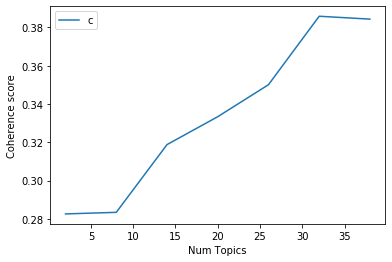

In [46]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2825
Num Topics = 8  has Coherence Value of 0.2834
Num Topics = 14  has Coherence Value of 0.3188
Num Topics = 20  has Coherence Value of 0.3334
Num Topics = 26  has Coherence Value of 0.3501
Num Topics = 32  has Coherence Value of 0.3859
Num Topics = 38  has Coherence Value of 0.3844
